In [1]:
import numpy as np
import rasterio as rio
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable # <-- allows us to align the colorbar with the plot
from matplotlib.ticker import FormatStrFormatter
import pygeohydro as gh
import richdem as rd

# File paths
elev_fname = '../data/ubrb_dem_30m.tif' # DEM for the Upper Boise River Basin
lulc_fname = '../data/upper_boise_landcover_30m.tif' # NLCD land-cover raster for the Upper Boise River Basin

nlcd_cfile = './nlcd_classifications.csv'  # Lookup table linking NLCD codes to human-readable labels
nlcd_df = pd.read_csv(nlcd_cfile)

/Users/lejoflores/GEOS-505-Fall2025/env/lib/python3.12/site-packages/richdem/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
ubrb_elev = rio.open(elev_fname)
ubrb_elev_rda = rd.rdarray(ubrb_elev.read(1), no_data=-9999)

In [3]:
ubrb_aspect = rd.TerrainAttribute(ubrb_elev_rda, attrib='aspect')
ubrb_slope = rd.TerrainAttribute(ubrb_elev_rda, attrib='slope_degrees')


Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)



A Aspect attribute calculation
C Horn, B.K.P., 1981. Hill shading and the reflectance map. Proceedings of the IEEE 69, 14–47. doi:10.1109/PROC.1981.11918

t Wall-time = 0.822027======================= ] (99% - 0.0s - 1 threads)

A Slope calculation (degrees)
C Horn, B.K.P., 1981. Hill shading and the reflectance map. Proceedings of the IEEE 69, 14–47. doi:10.1109/PROC.1981.11918

t Wall-time = 0.375783======================= ] (99% - 0.0s - 1 threads)


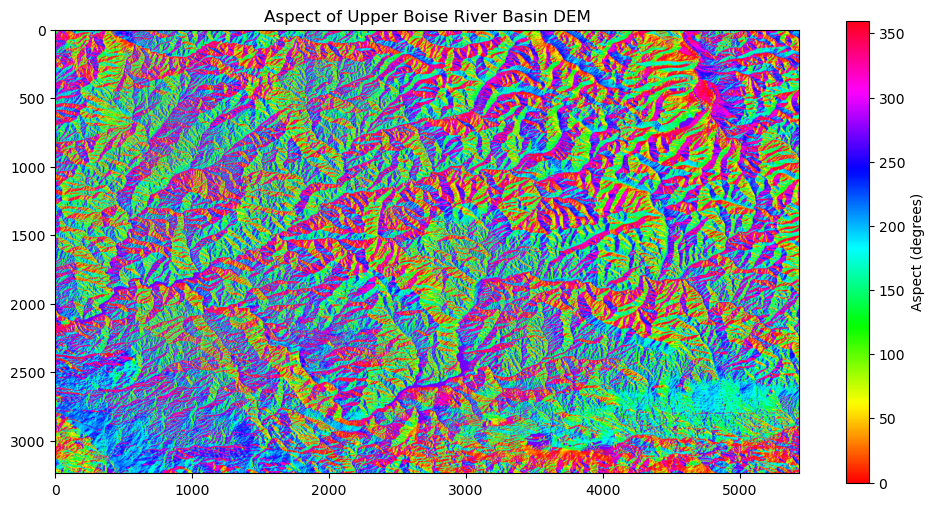

In [8]:
fig = plt.figure(figsize=(12, 6))
plt.imshow(ubrb_aspect, cmap='hsv')
plt.colorbar(label='Aspect (degrees)')
plt.title('Aspect of Upper Boise River Basin DEM')
plt.show()

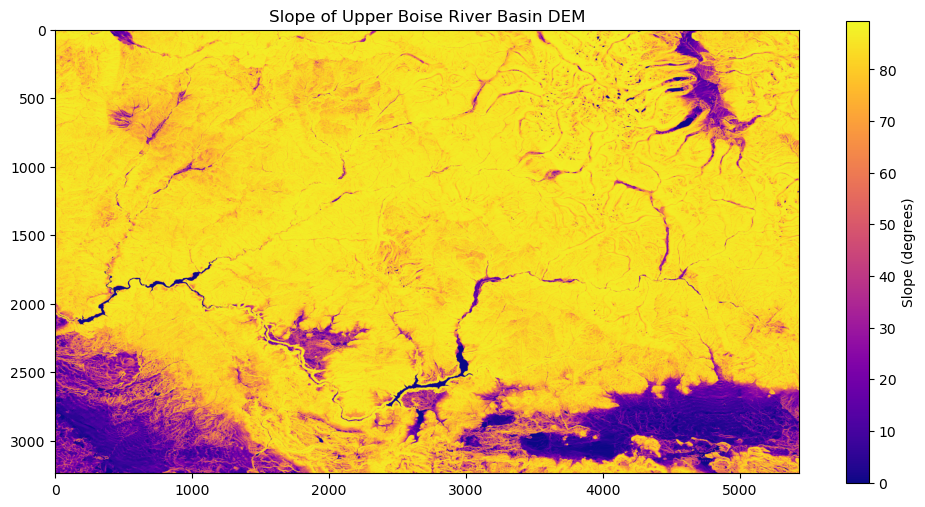

In [9]:
plt.figure(figsize=(12, 6))
plt.imshow(ubrb_slope, cmap='plasma')
plt.colorbar(label='Slope (degrees)')
plt.title('Slope of Upper Boise River Basin DEM')
plt.show()

^ This doesn't appear correct. Can you surmise as to why?